In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Iris = pd.read_csv("C:/Python/SVM/IRIS.csv")
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


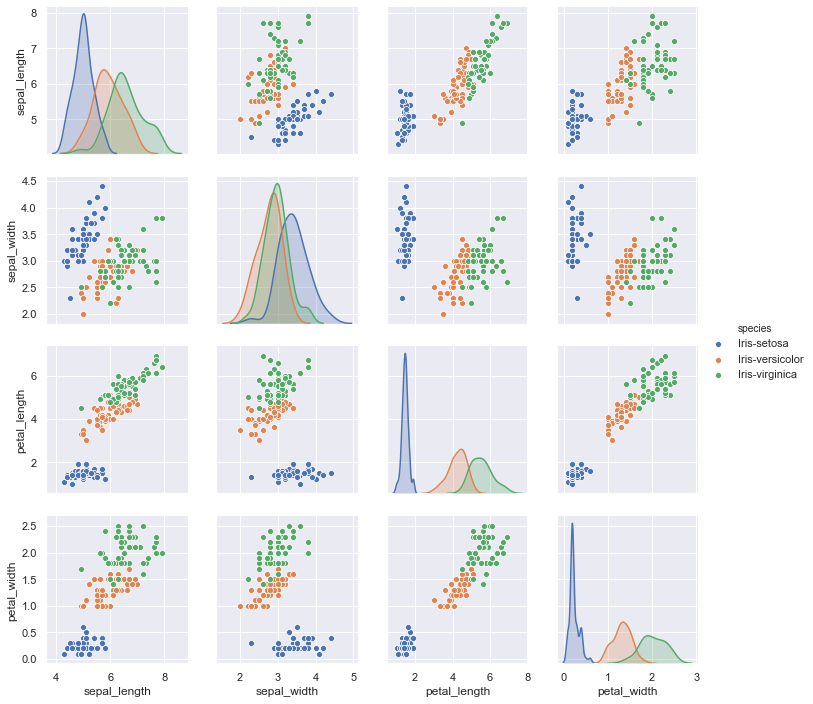

In [7]:
#Exploratory Data Analysis
import seaborn as sns
sns.set()
sns.pairplot(Iris, hue ='species')

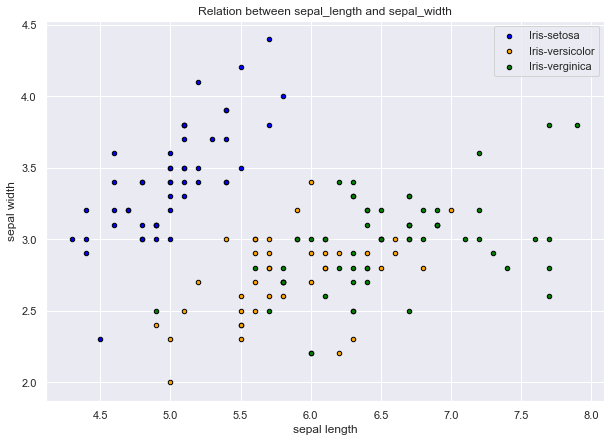

In [9]:
ax1 = Iris[Iris['species'] == 'Iris-setosa'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', color = 'blue', edgecolor = 'black', figsize = (10,7))
Iris[Iris['species'] == 'Iris-versicolor'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', color = 'orange', edgecolor = 'black', figsize = (10,7), ax = ax1)
Iris[Iris['species'] == 'Iris-virginica'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', color = 'green', edgecolor = 'black', figsize = (10,7), ax =ax1)
plt.legend(labels = ['Iris-setosa','Iris-versicolor','Iris-verginica'])
plt.title('Relation between sepal_length and sepal_width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [10]:
X = Iris.iloc[:,0:4].values
y = Iris.iloc[:,4].values

In [14]:
#Splitting of Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Applying PCA Function
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72607621, 0.23881122])

In [17]:
#SVM Algorithn

from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear')
svcclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = svcclassifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versico

In [19]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 21  2]
 [ 0  8 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.72      0.91      0.81        23
 Iris-virginica       0.87      0.62      0.72        21

       accuracy                           0.83        60
      macro avg       0.86      0.84      0.84        60
   weighted avg       0.85      0.83      0.83        60



In [20]:
#Polynomial Kernel

svclassifier = SVC(kernel = 'poly', degree = 8)
svclassifier.fit(X_train, y_train)

C:\Users\svanapalli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  7]
 [ 0 23  0]
 [ 2  7 12]]
                 precision    recall  f1-score   support

    Iris-setosa       0.82      0.56      0.67        16
Iris-versicolor       0.77      1.00      0.87        23
 Iris-virginica       0.63      0.57      0.60        21

       accuracy                           0.73        60
      macro avg       0.74      0.71      0.71        60
   weighted avg       0.73      0.73      0.72        60



In [24]:
#Gaussian Kernel

svclassifier = SVC(kernel = 'rbf')
svclassifier.fit(X_train,  y_train)

C:\Users\svanapalli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = svclassifier.predict(X_test)

In [26]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 20  3]
 [ 0  4 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.83      0.87      0.85        23
 Iris-virginica       0.85      0.81      0.83        21

       accuracy                           0.88        60
      macro avg       0.89      0.89      0.89        60
   weighted avg       0.88      0.88      0.88        60



In [27]:
#Sigmoid Kernel

svclassifier = SVC(kernel = 'sigmoid')
svclassifier.fit(X_train,  y_train)

C:\Users\svanapalli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred = svclassifier.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 11 12]
 [ 0  2 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.48      0.61        23
 Iris-virginica       0.61      0.90      0.73        21

       accuracy                           0.77        60
      macro avg       0.82      0.79      0.78        60
   weighted avg       0.81      0.77      0.76        60



In [30]:
#Gausian Kernel performed well for this model.
#And also, the data is not linearly seperable, because it has three classes.
#hence it is a non-linearly seperable data.
#Simple SVM can only be performed on linearly seperable data
#Polynomial kernel, Gaussian kernel and Sigmoid kernel functions are used on non-linearly seperable data.
#Based on the accuracy, we need to decide as of which function best suits the model